# **Climate Change Analysis Dataset**

### **Load and Understanding Data**

In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
climat_data = pd.read_csv('/content/weather.csv')

In [3]:
climat_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [4]:
climat_data.shape

(366, 19)

In [5]:
climat_data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
climat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustSpeed  364 non-null    float64
 6   WindSpeed9am   359 non-null    float64
 7   WindSpeed3pm   366 non-null    int64  
 8   Humidity9am    366 non-null    int64  
 9   Humidity3pm    366 non-null    int64  
 10  Pressure9am    366 non-null    float64
 11  Pressure3pm    366 non-null    float64
 12  Cloud9am       366 non-null    int64  
 13  Cloud3pm       366 non-null    int64  
 14  Temp9am        366 non-null    float64
 15  Temp3pm        366 non-null    float64
 16  RainToday      366 non-null    int64  
 17  RISK_MM        366 non-null    float64
 18  RainTomorr

In [7]:
climat_data.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustSpeed,2
WindSpeed9am,7
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [8]:
climat_data.dropna(inplace=True)

In [9]:
climat_data.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [10]:
climat_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,7.362429,20.601412,1.420904,4.558192,7.925424,40.011299,9.666667,18.014124,71.875706,44.454802,1019.562147,1016.692090,3.920904,4.019774,12.438701,19.271469,0.180791,1.448588,0.180791
std,6.010927,6.708966,4.235358,2.667877,3.510039,13.034488,7.978489,8.880531,13.161939,16.944316,6.602685,6.373679,2.962363,2.672312,5.630160,6.663681,0.385390,4.282531,0.385390
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000,0.000000,0.000000
25%,2.400000,15.100000,0.000000,2.400000,5.925000,31.000000,6.000000,11.000000,64.000000,32.000000,1015.225000,1012.725000,1.000000,1.000000,7.725000,14.300000,0.000000,0.000000,0.000000
50%,7.500000,19.750000,0.000000,4.200000,8.650000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.000000,1017.200000,4.000000,4.000000,12.600000,18.600000,0.000000,0.000000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.600000,46.000000,13.000000,24.000000,80.000000,54.750000,1024.400000,1021.350000,7.000000,7.000000,17.000000,24.000000,0.000000,0.200000,0.000000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,1.000000,39.800000,1.000000


### **Exploratory Data Analysis(EDA)**

In [11]:
climat_data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

**Find Distribution of few Features of Dataset**

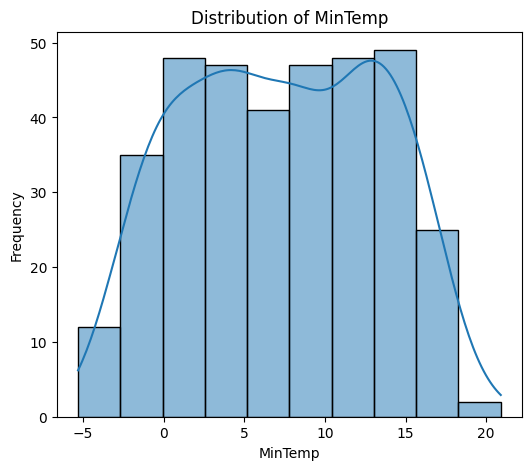

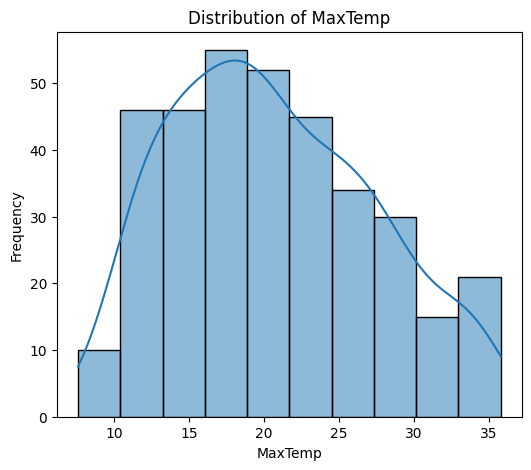

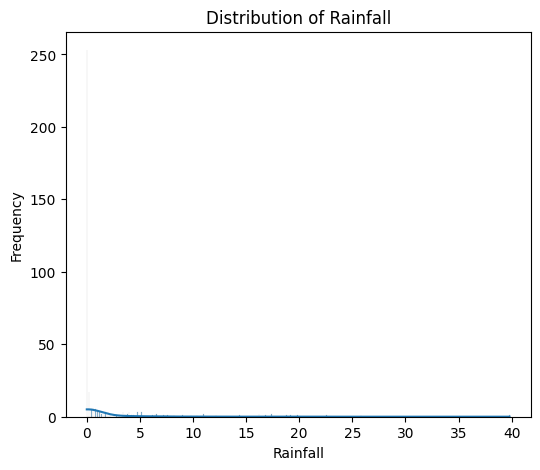

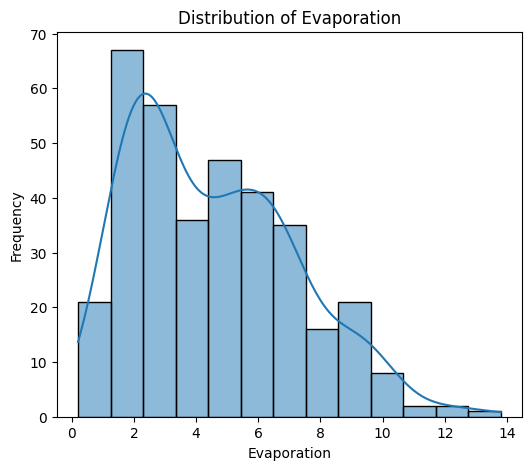

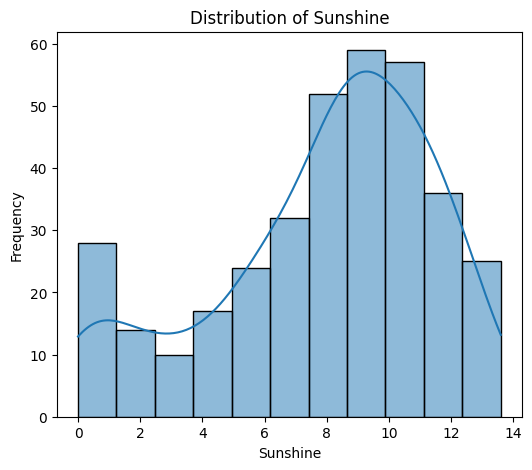

In [45]:
# Histograms for numerical features
for feature in ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']:
    plt.figure(figsize=(6, 5))
    sns.histplot(climat_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

**Find Relationship Between MinTemp vs MaxTemp**

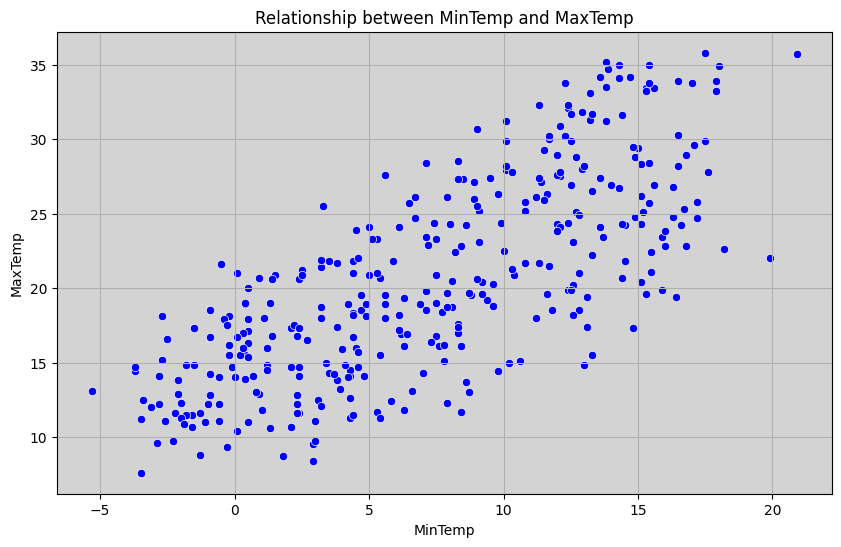

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MinTemp', y='MaxTemp', data=climat_data, color='blue')

# Set background color to lightgray
plt.gca().set_facecolor('lightgray')

plt.title('Relationship between MinTemp and MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.grid(True)
plt.show()

KDE Plots for Relationship between MinTemp and MaxTemp

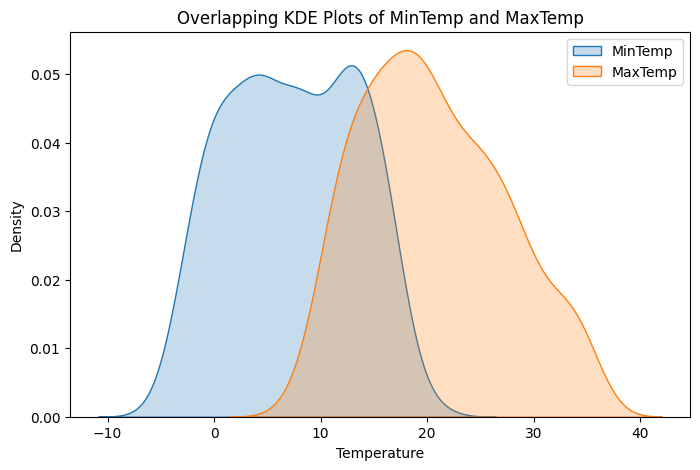

In [14]:
plt.figure(figsize=(8, 5))
sns.kdeplot(climat_data['MinTemp'], label='MinTemp',fill=True)
sns.kdeplot(climat_data['MaxTemp'], label='MaxTemp',fill=True)
plt.title('Overlapping KDE Plots of MinTemp and MaxTemp')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend()
plt.show()

**Find Relationship Between RainTomorrow vs Rainfall**

* 0 --> No Rain Tomorrow
* 1 --> Rain Tomorrow

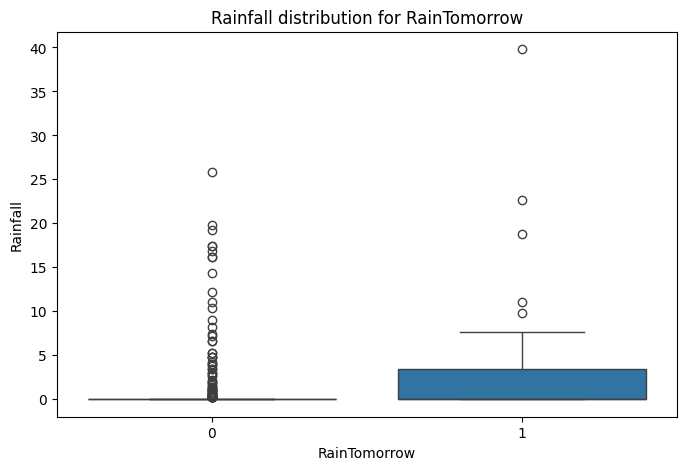

In [38]:
# Box plot for RainTomorrow vs Rainfall
plt.figure(figsize=(8, 5))
sns.boxplot(x='RainTomorrow', y='Rainfall', data=climat_data)
plt.title('Rainfall distribution for RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Rainfall')
plt.show()

**Correlation Matrix**

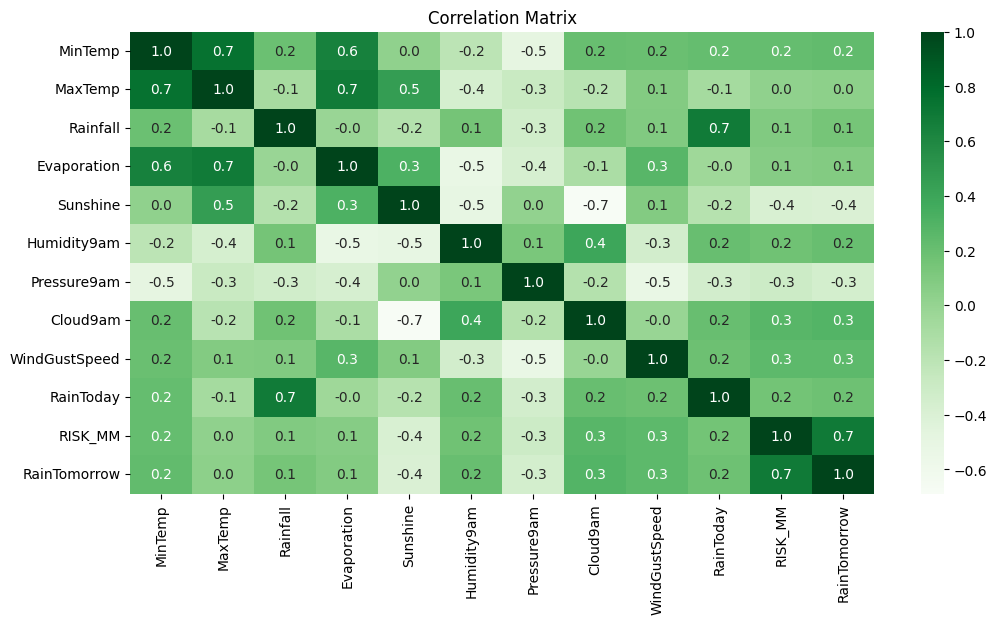

In [27]:
# select fe features for find correlation
climat_corr_data =['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','Humidity9am','Pressure9am', 'Cloud9am','WindGustSpeed','RainToday', 'RISK_MM', 'RainTomorrow']

# Calculate correlation matrix
climat_corr_data = climat_data[climat_corr_data]
correlation_matrix = climat_corr_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

### **Machine Learning Model**

**Preprocessing Data**

**Split Data for Variable(X) and Variable(Y) Features**

In [18]:
# Assuming important features
selected_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM']
X = climat_data[selected_features]
y = climat_data['RainTomorrow']

# Split Test and Train Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)  # Adjust test_size and random_state as needed

In [19]:
print(X.shape,X_train.shape,X_test.shape)

(354, 18) (283, 18) (71, 18)


In [20]:
# Add StandardScaler for preprocessing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuray = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuray * 100:.1f}%')

Accuracy: 100.0%


**Find Accuracy Score Mean Value**

In [37]:
model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # cv=5 for 5-fold cross-validation
mean_accuracy = scores.mean()

print(f"Mean Accuracy: {mean_accuracy}")

Mean Accuracy: 0.9774245472837023


**Generate Prediction using Dataset**
* 0 --> No Rain
* 1 --> Expect Rain



In [34]:
input_data = (13.7,23.4,3.6,5.8,3.3,85,6,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8)

input_data_reshaped = pd.DataFrame([input_data], columns=selected_features)

# Scale the input data
input_data_scaled = scaler.transform(input_data_reshaped)

# Get the prediction
prediction = model.predict(input_data_scaled)

# Check the predicted class label (prediction[0])
if prediction[0] == 0:
    print("No Rain Tomorrow")
else:
    print("Expect Rain Tomorrow")


Expect Rain Tomorrow


## **Conclusion:**
The specific numerical value of the prediction or the associated probabilities would determine the exact confidence of the prediction. However, considering that the model was trained on a dataset with high accuracy (approximately 98%), it is reasonable to assume that the prediction is reliable and indicative of the expected weather conditions.